# TP Majeures Science des données

## Done by MATHIEU SROUR and OMAR ALLOUCH

### Gérér l'affichage des courbes

On va utiliser pyplot du module matplotlib pour afficher les courbes et les graphiques

La commande *%matplotlib inline* fait en sorte que les courbes apparaissent dans le notebook.

Si vous voulez sauvegarder les courbes sans les afficher, il faut ajouter la commande *matplotlib.use('Agg')* entre les 2 commandes suivantes :


In [1]:
import matplotlib.pyplot as plt

## Machines à Vecteurs de Support (SVM)

Si anaconda3 n'est pas installé, il nous faut d'abord installer les modules nécessaires. 


In [26]:
"""
!pip3 -q install sklearn
!pip3 -q install matplotlib
!pip3 -q install seaborn
"""

'\n!pip3 -q install sklearn\n!pip3 -q install matplotlib\n!pip3 -q install seaborn\n'

## Première partie : prise en main des SVM
Cette partie est librement inspirée du travail de Jake VenderPlas, auteur du livre [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do). Son [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) (en anglais) regorge de fichiers utiles.

Dans un premier temps, on va générer des données jouets, linéairement séparables :

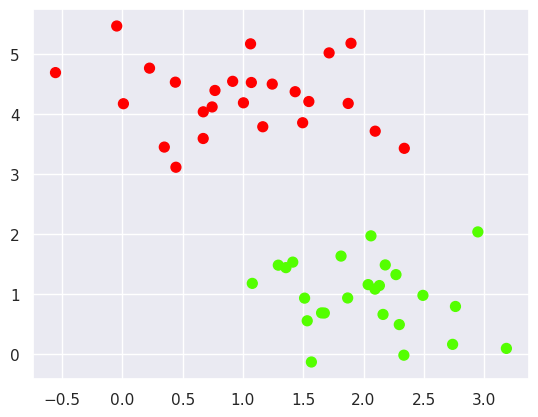

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Un petit environment qui donne de meilleurs graphes
import seaborn as sns; sns.set()

# Fonction sklearn pour générer des données simples
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Affichage des données
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

### SVM linéaire (Séparateur à vaste marge)
On va commencer par apprendre un SVM linéaire (sans noyau) à l'aide de scikit-learn :

In [3]:
# import de la classe - qui s'appelle SVC et pas SVM...
from sklearn.svm import SVC

# Définition du modèle
model = SVC(kernel='linear', C=1E10)

# Apprentissage sur les donnée
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

On va utiliser une fonction d'affichage qui va bien, où tout ce qui est nécessaire est affiché.

In [4]:
import numpy as np

def affiche_fonction_de_decision(model, ax=None, plot_support=True):
    """Affiche le séparateur, les marges, et les vecteurs de support d'un SVM en 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # création de la grille pour l'évaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # affichage de l'hyperplan et des marges
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affichage des vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Voyons ce que cela donne sur notre séparateur linéaire à vaste marge :

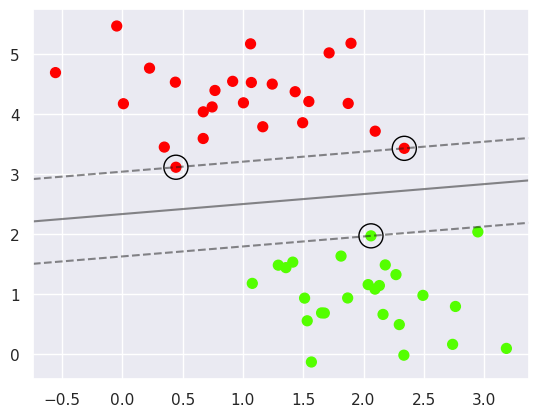

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(model)

Sur ce graphe, on voit le séparateur (ligne pleine), les vecteurs de support (points entourés) et la marge (matérialisée par des lignes discontinues). On a ici le séparateur qui maximise la marge. Scikit-learn nous permet, après apprentissage, de récupérer les vecteurs de supports:

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Seules trois données sont utiles pour classer de nouvelles données. On peut s'en assurer en rajoutant des données sans changer le modèle :

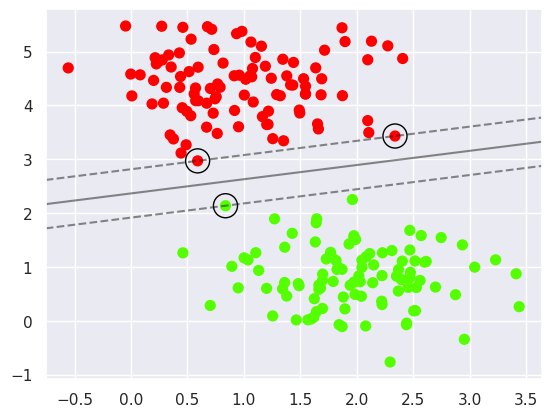

In [7]:
X2, y2 = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)

model2 = SVC(kernel='linear', C=1E10)
model2.fit(X2, y2)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='prism')
affiche_fonction_de_decision(model2);

## SVM non linéaire
Comme vu en cours, la puissance des séparateurs linéaires est limitée (à des données linéairement séparables). Mais il est possible de contourner cette limitation par l'utilisation de noyaux.

On va commencer par générer des données non-linéairement séparables, puis on apprend un classifieur SVM linéaire et on affiche le résultat :

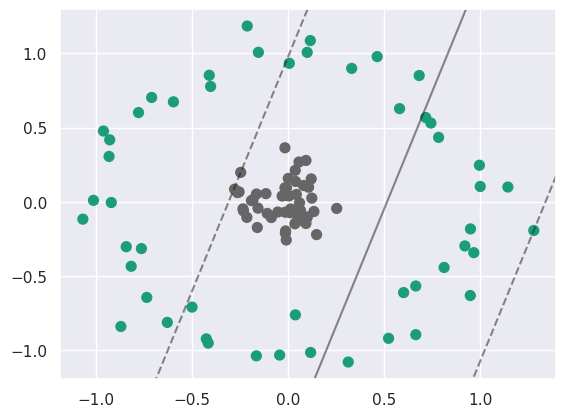

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf, plot_support=False)

Clairement notre apprentissage de séparateur linéaire a échoué...

On va manuellement ajouter une troisième dimension *z* :

In [13]:
z = np.exp(-(X ** 2).sum(1))

On peut afficher les données augmentées et se rendre compte qu'elles sont linéairement séparables dans ce nouvel espace de dimension plus grande :

Text(0.5, 0, 'z')

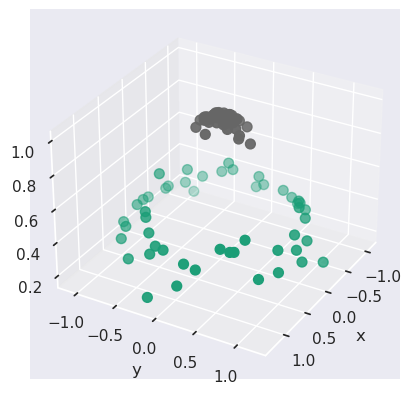

In [14]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='Dark2')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Le plan définit par z=0.7 (par exemple) sépare les 2 classes parfaitement.

Bien entendu, la projection en plus grande dimension est capitale, et en choisissant un autre calcul pour *z* on aurait probablement obtenu des données non linéairement séparables.

Et s'il fallait faire effectivement la projection, cela limiterait drastiquement la dimension de l'espace de plongement ainsi que le nombre de données traitables. C'est pourquoi l'utilisation de noyaux (kernels en anglais) est d'une grande efficacité.

En Scikit-Learn, il suffit de modifier le paramètre *kernel* : jusqu'à présent, nous avons utilisé 'linear' comme valeur. On peut par exemple utiliser *rbf* pour 'radial basis function', le noyau gaussien (celui qui transforme notre espace de description initial vers le 3D avec $z$ précédent), et il nous reste à trouver la bonne valeur du paramètre :

In [15]:
clf = SVC(kernel='rbf', C=1E10)
clf.fit(X, y)

SVC(C=10000000000.0)

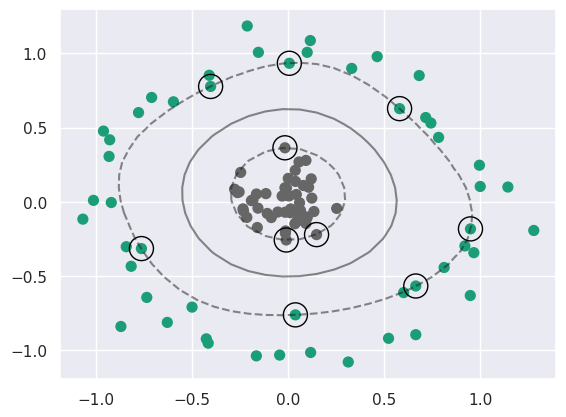

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

**Exercice** : exécuter les instructions permettant un apprentissage avec un autre noyau -- pour un plongement dans un autre espace (par exemple noyau polynomial de degré 5), et la visualisation du séparateur. Vous devriez constater que ce n'est pas un noyaux très adapté !

In [19]:
# a vous
clf = SVC(kernel='poly', degree=5)
clf.fit(X, y)

SVC(degree=5, kernel='poly')

On voit ici que le séparateur (et la marge associée) ne sont pas linéaire dans l'espace des données, mais qu'ils peuvent s'y représenter sans difficulté.

Notons aussi que le nombre de vecteurs de support reste très petit.

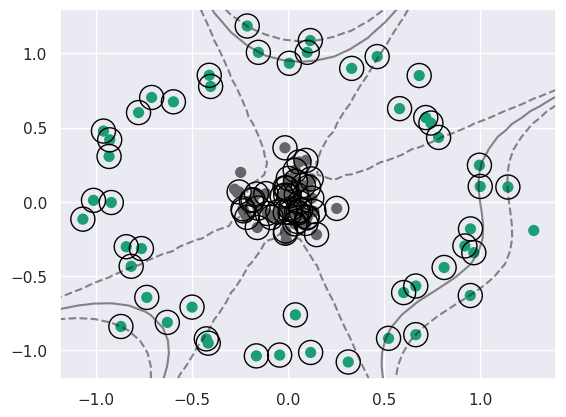

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

Evidemment, notre classifieur (polynomial) a échoué à separer proprement les 2 classes

### SVM à marge douce

Il est aussi possible que le problème soit linéairement séparable (dans la dimension initiale des données ou dans un plongement) mais que le bruit (=la mauvaise qualité des données) empêche l'apprenant de trouver un séparateur.

On utilise alors ce que l'on appelle un classifieur à marge douce : on autorise certains points à être dans la marge, voire du mauvais côté de l'hyperplan. C'est le role du paramètre *C* : pour des grosses valeurs, on est quasiment en marge dure, mais plus *C* prend des petites valeurs, plus les marges deviennent permissibles.

On va prendre des données qui se chevauchent un peu : (à ce stade, il est important de comprendre la spécificité des données que l'on génére ci-après: en cas de doute appelez votre enseignant)

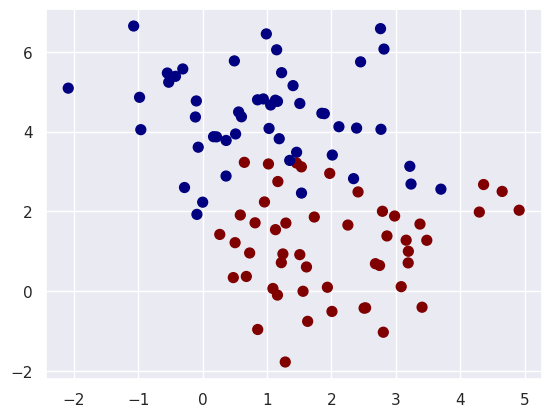

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

On joue alors avec la valeur de *C*

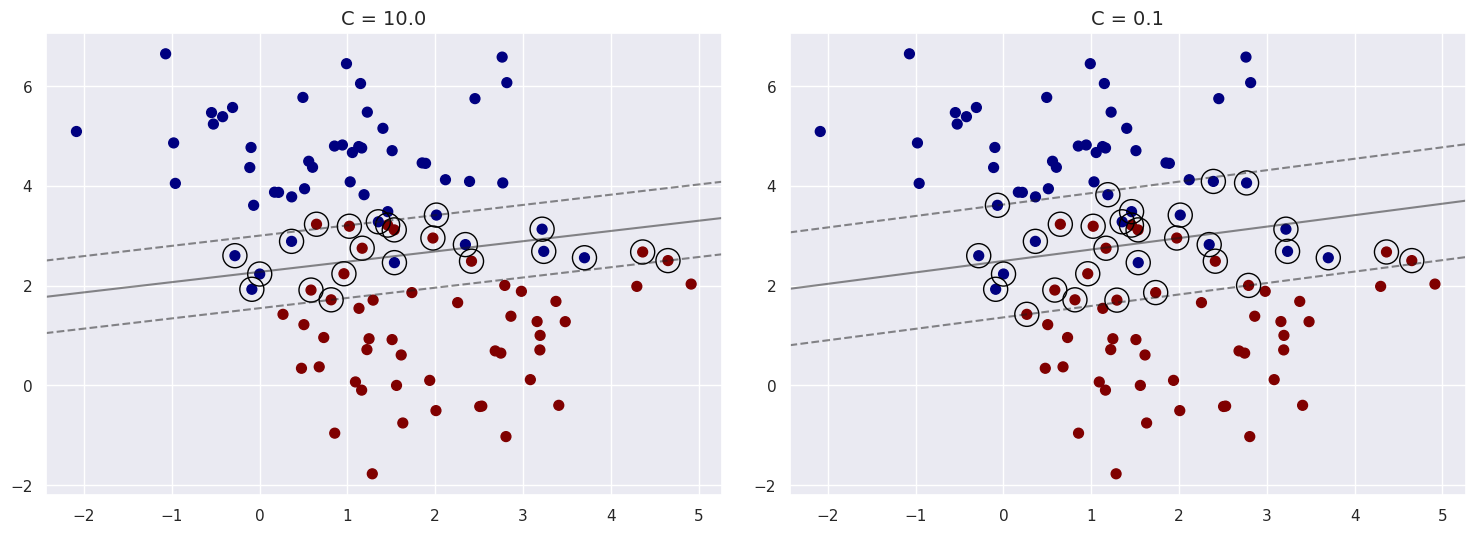

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    affiche_fonction_de_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Paramétrer (tuner) un SVM
Tous les noyaux sont paramétrés : il est question ici d'étudier l'impact d'un (hyper)paramètre sur la qualité de l'apprentissage.
Pour cela, on va générer des données qui ne sont pas linéairement séparables :

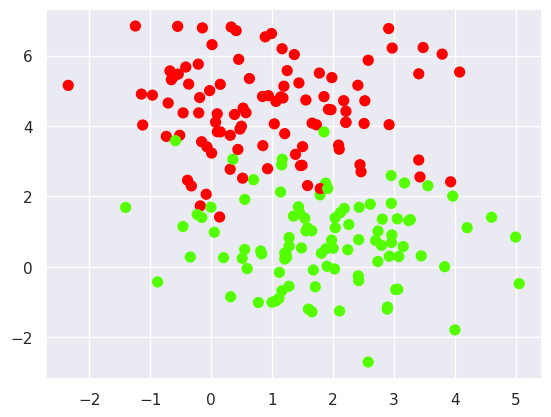

In [23]:
X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

On va étudier 2 noyaux différents
- le noyau polynomial (*kernel='poly'*) qui a 2 paramètres, *degree* qu'il faut faire varier entre 2 et 6 (au minimum), et *C* (lié à la 'douceur' de la marge)
- le noyau gaussien (*kernel='rbf'*) qui a aussi 2 paramètres, *gamma*, qu'il faut faire varier de 1 à 0.01, et *C* 

A chaque fois, en plus de l'affichage des séparateurs, et de l'estimation de l'erreur, il serait intéressant de regarder combien de vecteurs de support le classifieur appris a besoin.

Nombre de vecteurs de support (sur 200 données) : 26


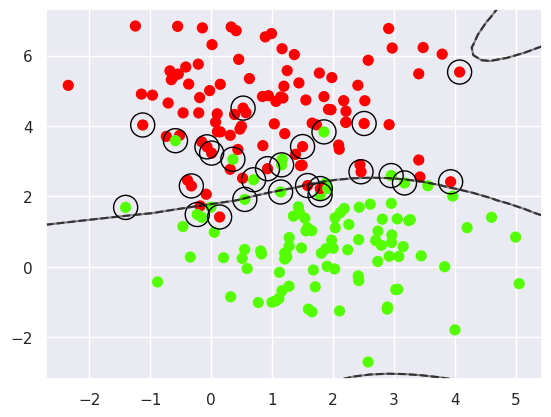

In [24]:
# Exemple avec le noyau gaussien et des valeurs pour gamma et C
clf = SVC(kernel='rbf', gamma=0.01, C=1E10)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(clf) 
print("Nombre de vecteurs de support (sur 200 données) :", len(clf.support_vectors_))

A vous de jouer ! (pour chaque noyau, faire varier les hyper-paramètres dans les intervalles mentionnés, et pour chaque couple d'hyper-paramètres : afficher la frontière de décison, le nombre de vecteurs supports du modèle (le plus petit est le mieux), et le score estimé sur un échantillon test de taille 100 généré de la même façon que l'échantillon d'apprentissage.

## Plusieurs models avec un noyau rbf

Gamma=0.01, C=0.1, Number of support vectors: 152
Gamma=0.01, C=10.0, Number of support vectors: 43
Gamma=0.01, C=10000, Number of support vectors: 36
Gamma=0.01, C=10000000000.0, Number of support vectors: 26
Gamma=0.1, C=0.1, Number of support vectors: 93
Gamma=0.1, C=10.0, Number of support vectors: 42
Gamma=0.1, C=10000, Number of support vectors: 32
Gamma=0.1, C=10000000000.0, Number of support vectors: 26
Gamma=1, C=0.1, Number of support vectors: 161
Gamma=1, C=10.0, Number of support vectors: 72
Gamma=1, C=10000, Number of support vectors: 39
Gamma=1, C=10000000000.0, Number of support vectors: 39


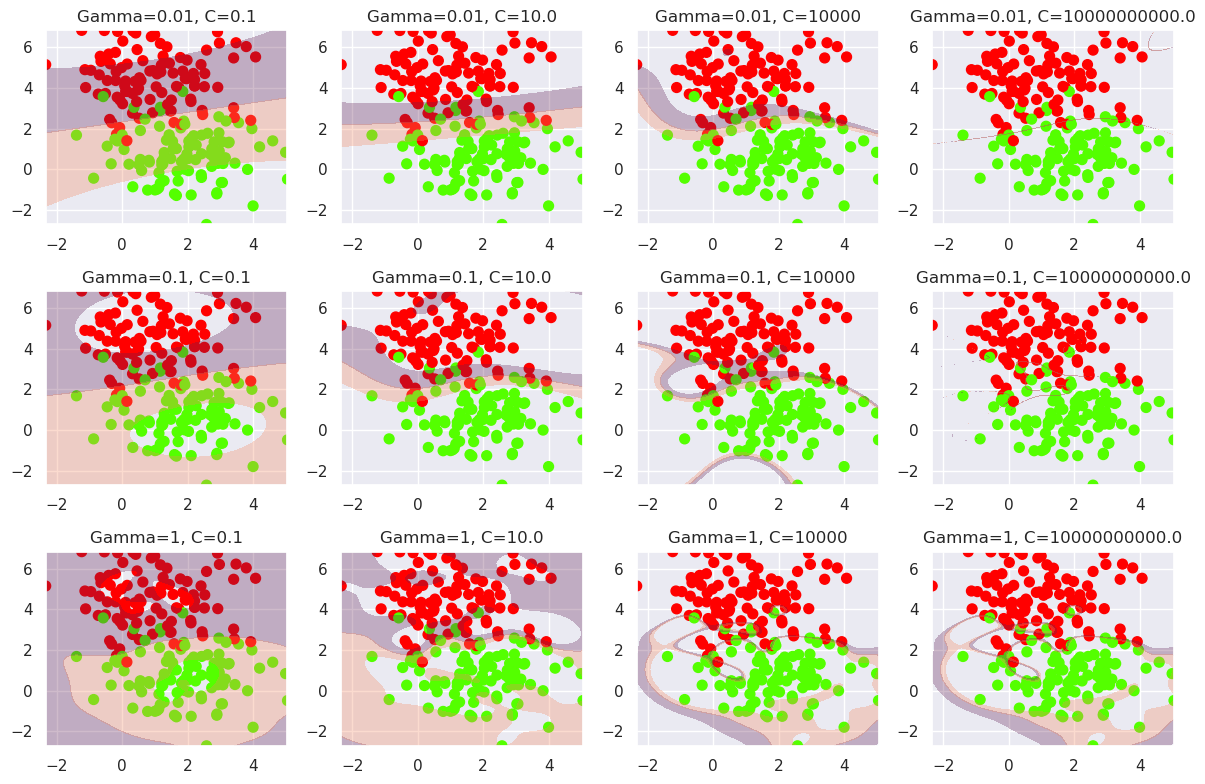

In [25]:
gamma_values = [0.01, 0.1, 1]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(gamma_values)
num_cols = len(C_values)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        clf.fit(X, y)
        
        # Create a subplot
        ax = axes[i, j]
        
        # Scatter plot the data
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
        ax.set_title(f'Gamma={gamma}, C={C}')
        
        # Plot the decision boundary
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3)

        print(f"Gamma={gamma}, C={C}, Number of support vectors: {len(clf.support_vectors_)}")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Il est facile de voir que l'augmentation de la valeur de sigma sert à adapter le modèle sur nos points d'apprentissage, cela sert donc à augmenter l'accuracy de notre modèle, de même cela peut entraîner que notre modèle s'adapte même au bruit dans nos données, et on risque d'entraîner un surajustement de notre modèle.
En revanche, en diminuant la valeur de sigma, le modèle s'adapte à la distribution générale de notre base de données, mais une valeur très basse de sigma peut entraîner le sous-apprentissage puisque le modèle ne s'adapte pas bien aux détails de nos points.

Pour l'hyperparamètre C : pour des valeurs élevées, on est quasiment en marge dure et on a un minimum d'erreurs de classifications des points d'apprentissage, et la frontière de décision sera plus complexe et plus adaptée sur la base de données d'apprentissage, mais on risque d'entrer dans le phénomène de sur-apprentissage où le modèle s'adapte aux données d'apprentissage mais n'arrive pas à généraliser sur d'autres données.
En revanche, en diminuant C, on autorise plus d'erreurs de classifications des points d'apprentissage, ce qui entraîne une marge plus douce et une frontière de décision plus simple, mais cela pourrait conduire à un sous-apprentissage.

## Plusieurs modeles avec un noyau polynomial

Degree=2, C=0.1, Number of support vectors: 58
Degree=2, C=10.0, Number of support vectors: 39
Degree=2, C=10000, Number of support vectors: 39
Degree=2, C=10000000000.0, Number of support vectors: 23
Degree=4, C=0.1, Number of support vectors: 47
Degree=4, C=10.0, Number of support vectors: 40
Degree=4, C=10000, Number of support vectors: 42
Degree=4, C=10000000000.0, Number of support vectors: 26
Degree=6, C=0.1, Number of support vectors: 44
Degree=6, C=10.0, Number of support vectors: 44
Degree=6, C=10000, Number of support vectors: 46
Degree=6, C=10000000000.0, Number of support vectors: 32


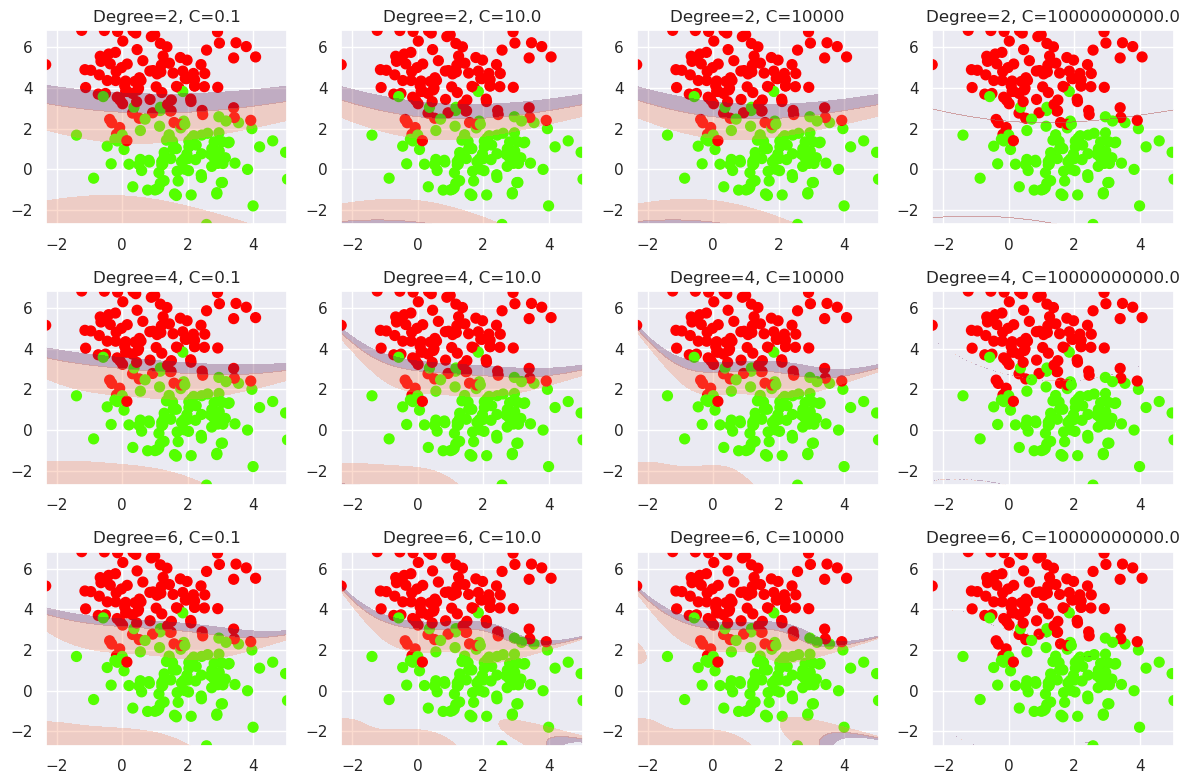

In [26]:
degrees = [2, 4, 6]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(degrees)
num_cols = len(C_values)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X, y)
        
        # Create a subplot
        ax = axes[i, j]
        
        # Scatter plot the data
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
        ax.set_title(f'Degree={degree}, C={C}')
        
        # Plot the decision boundary
        # Replace this with your affiche_fonction_de_decision(clf) function
        # This example draws a simple decision boundary
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3)

        print(f"Degree={degree}, C={C}, Number of support vectors: {len(clf.support_vectors_)}")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

L'effet du degré de polynôme : plus on augmente le degré, plus la frontière de décision devient complexe et adaptée à notre donnée d'apprentissage, mais avec une valeur de degré très élevée, on risque d'entrer dans le phénomène de sur-apprentissage.
En revanche, si le degré est plus petit, la frontière devient moins complexe, et on évite le phénomène de sur-apprentissage, mais on risque d'entrer dans le phénomène de sous-apprentissage si notre frontière de décision n'est pas suffisamment complexe pour s'adapter aux données.

### Test Set

X_test, ytest = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=1.3)  
En utilisant cette ligne de code, on obtient  à peu près les même 100 points que dans l'ensemble d'apprentissage, c'est pour cela j'ai réalisé 2 ensembles de test: l'une générée par la ligne de code ci-dessus
et l'autre en créant 300 points, puis en choisissant les 100 derniers. De cette manière, nous obtenons de nouveaux points distincts de ceux de l'ensemble d'apprentissage.

### 2eme facon de la création du test set

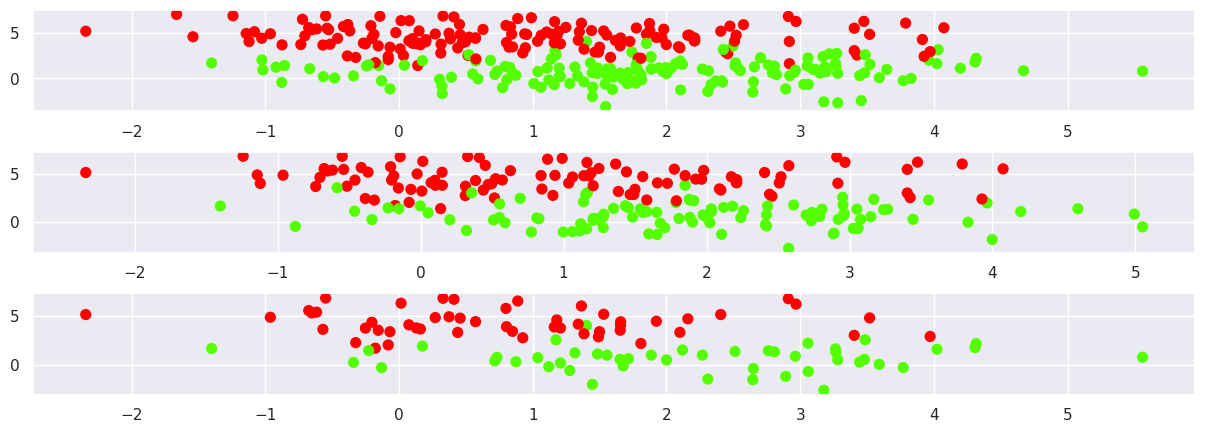

In [27]:
X_all, y_all = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=1.3)
X_test = X_all[200:, :]
y_test = y_all[200:]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 5))
plt.subplots_adjust(hspace=0.4)

axes[0].scatter(X_all[:, 0], X_all[:, 1], c=y_all, s=50, cmap='prism')
axes[1].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='prism')

## Accuracy des SVM avec les noyaux rbf

In [28]:
from sklearn.metrics import accuracy_score

gamma_values = [0.01, 0.1, 1]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(gamma_values)
num_cols = len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        clf.fit(X, y)
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Gamma={gamma}, C={C}, Test Accuracy: {accuracy:.2f}")

Gamma=0.01, C=0.1, Test Accuracy: 0.94
Gamma=0.01, C=10.0, Test Accuracy: 0.94
Gamma=0.01, C=10000, Test Accuracy: 0.94
Gamma=0.01, C=10000000000.0, Test Accuracy: 0.93
Gamma=0.1, C=0.1, Test Accuracy: 0.94
Gamma=0.1, C=10.0, Test Accuracy: 0.95
Gamma=0.1, C=10000, Test Accuracy: 0.92
Gamma=0.1, C=10000000000.0, Test Accuracy: 0.93
Gamma=1, C=0.1, Test Accuracy: 0.95
Gamma=1, C=10.0, Test Accuracy: 0.93
Gamma=1, C=10000, Test Accuracy: 0.94
Gamma=1, C=10000000000.0, Test Accuracy: 0.94


## Accuracy des SVM avec les noyaux poly

In [29]:
from sklearn.metrics import accuracy_score

degrees = [2, 4, 6]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(degrees)
num_cols = len(C_values)

for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X, y)
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Degree={degree}, C={C}, Test Accuracy: {accuracy:2f}")


Degree=2, C=0.1, Test Accuracy: 0.940000
Degree=2, C=10.0, Test Accuracy: 0.940000
Degree=2, C=10000, Test Accuracy: 0.940000
Degree=2, C=10000000000.0, Test Accuracy: 0.930000
Degree=4, C=0.1, Test Accuracy: 0.940000
Degree=4, C=10.0, Test Accuracy: 0.940000
Degree=4, C=10000, Test Accuracy: 0.920000
Degree=4, C=10000000000.0, Test Accuracy: 0.930000
Degree=6, C=0.1, Test Accuracy: 0.930000
Degree=6, C=10.0, Test Accuracy: 0.920000
Degree=6, C=10000, Test Accuracy: 0.920000
Degree=6, C=10000000000.0, Test Accuracy: 0.940000


On peut voire que le svm avec noyau rbf est un peu plux mieux que celui avec un noyau polynomial, le modele avec la plus meilleure accuracy est svm a noyau rbf de C=10000 et gamma=0.1 avec 42 vecteurs de supports.
Le modele ayant le moins de vecteurs de support est poly de C=10^10 et degre = 4, mais ca vient avec une grande valeur de C, ce qui rend le modele plus complexe, temps de computation plus longue.

### 1ere facon de la création du test set

In [30]:
X_test, y_test = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.3)

from sklearn.metrics import accuracy_score

gamma_values = [0.01, 0.1, 1]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(gamma_values)
num_cols = len(C_values)

for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='rbf', gamma=gamma, C=C)
        clf.fit(X, y)
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        print(f"Gamma={gamma}, C={C}, Test Accuracy: {accuracy:.2f}")
        
from sklearn.metrics import accuracy_score

degrees = [2, 4, 6]
C_values = [0.1, 10.0, 10000, 1E10]

# Set the size and layout of the subplots
num_rows = len(degrees)
num_cols = len(C_values)

for i, degree in enumerate(degrees):
    for j, C in enumerate(C_values):
        clf = SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X, y)
        
        y_pred = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Degree={degree}, C={C}, Test Accuracy: {accuracy:2f}")


Gamma=0.01, C=0.1, Test Accuracy: 0.87
Gamma=0.01, C=10.0, Test Accuracy: 0.89
Gamma=0.01, C=10000, Test Accuracy: 0.86
Gamma=0.01, C=10000000000.0, Test Accuracy: 0.86
Gamma=0.1, C=0.1, Test Accuracy: 0.88
Gamma=0.1, C=10.0, Test Accuracy: 0.86
Gamma=0.1, C=10000, Test Accuracy: 0.86
Gamma=0.1, C=10000000000.0, Test Accuracy: 0.84
Gamma=1, C=0.1, Test Accuracy: 0.85
Gamma=1, C=10.0, Test Accuracy: 0.87
Gamma=1, C=10000, Test Accuracy: 0.87
Gamma=1, C=10000000000.0, Test Accuracy: 0.87
Degree=2, C=0.1, Test Accuracy: 0.860000
Degree=2, C=10.0, Test Accuracy: 0.870000
Degree=2, C=10000, Test Accuracy: 0.870000
Degree=2, C=10000000000.0, Test Accuracy: 0.870000
Degree=4, C=0.1, Test Accuracy: 0.860000
Degree=4, C=10.0, Test Accuracy: 0.860000
Degree=4, C=10000, Test Accuracy: 0.860000
Degree=4, C=10000000000.0, Test Accuracy: 0.870000
Degree=6, C=0.1, Test Accuracy: 0.860000
Degree=6, C=10.0, Test Accuracy: 0.880000
Degree=6, C=10000, Test Accuracy: 0.880000
Degree=6, C=10000000000.0, Te

On peut voir que le svm avec noyau rbf est un peu plux mieux que celui avec un noyau polynomial, le modele avec la plus meilleure accuracy est svm a noyau rbf de C=10 et gamma=0.01 avec 42 veteurs de supports.
Le modele ayant le moins de vecteurs de support est poly de C=10^10 et degre = 4, mais ca vient avec une grande valeur de C, ce qui rend le modele plus complexe, temps de computation plus longue.

# Deuxième partie : un traitement (presque) complet
### Préparation des données
Nous allons utiliser un jeu de données réel - tiré de *Tsanas & Xifara : Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools, Energy and Buildings, Vol. 49, pp. 560-567, 2012* - qui vous est fourni avec l'énoncé.

Les 8 premières colonnes correspondent aux attributs descriptifs et les deux dernières, aux charges de chauffage et de climatisation (dans cet ordre).
Pour les utiliser en Python, vous pourrez vous servir du code suivant :

In [31]:
import numpy as np

data = np.loadtxt("./data.csv")
X = data[:,:-2]
Y = data[:,-2:]
Yheat = Y[:,0]
Ycool = Y[:,1]

Le problème initial, tel que présenté ici, est un problème de régression. Nous allons d'abord le transformer en problème de classification. Par une méthode de clustering, on veut répartir les charges de chauffage et de climatisation en 3 classes : faibles, moyennes, élevées.

In [32]:
from sklearn.cluster import KMeans
# La suite ? il s'agit de définir un classifieur du k-means avec k=3 
# et d'utiliser la méthode 'fit' sur les 2 ensembles de valeurs Y

# Le seul trick : les Y sont des vecteurs et les classifieurs sklearn ont besoin d'array :
# il faut les reshaper : Yheat_vector = Yheat.reshape(-1,1)

# Après apprentissage du kmeans, les classes des données utilisées sont stockées dans mon_classifieur.labels_

# Concaténez les vecteurs Yheat et Ycool pour créer une seule matrice Y
Y_matrix = np.column_stack((Yheat, Ycool))

# Définissez un classifieur K-Means avec 3 clusters (k=3)
kmeans_classifier = KMeans(n_clusters=3)

# Utilisez la méthode 'fit' pour entraîner le modèle sur la matrice Y
kmeans_classifier.fit(Y_matrix)

# Après l'apprentissage du K-Means, les classes des données utilisées sont stockées dans kmeans_classifier.labels_
y = kmeans_classifier.labels_

/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Apprentissage
Nous voulons comparer plusieurs méthodes d'apprentissage :

1. Les arbres de décision  (*DecisionTreeClassifier* de la classe *sklearn.tree*, hyperparamètre à régler : *max_depth*)
2. SVM à noyau gaussien  (*SVC* avec *kernel='rbf'* de la classe *sklearn.svm*, hyperparamètre à régler : *gamma*)
3. SVM à noyau polynomial (*SVC* avec *kernel='poly'* de la classe *sklearn.svm*, hyperparamètre à régler : *degree*)

Ecrivez le code permettant de :
1. Séparer les données en un échantillon d'apprentissage et un échantillon de test (80/20)
2. Sélectionner les meilleurs valeurs des hyperparamètres sur l'échantillon d'apprentissage par validation croisée en utilisant 10 folders

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=18)
# A vous

## Pour l'arbre de décision

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

results_dict = {
    "max_depth": [],
    "mean_train_score": [],
    "mean_cv_score": []
}
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    cv_score = cross_validate(clf, X_train, y_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
    results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))
                                                                                
    result_df = pd.DataFrame(results_dict)
result_df

,max_depth,mean_train_score,mean_cv_score
0,1,0.745929,0.742676
1,2,0.890880,0.890931
2,3,0.929968,0.930011
3,4,0.959284,0.949498
4,5,0.962542,0.949577
5,6,0.966703,0.946298
6,7,0.984618,0.965812
7,8,0.990047,0.970756
8,9,0.992399,0.969143
9,10,0.995657,0.965865


In [35]:
results = pd.melt(result_df, id_vars=['max_depth'], value_vars=['mean_train_score','mean_cv_score'])
import altair as alt
alt.Chart(results).mark_line().encode(
    x=alt.X('max_depth', title= 'Depth of tree'),
    y= alt.Y('value',title = 'Score', scale=alt.Scale(zero=False)),
    color=alt.Color('variable', title='Score type')
)

alt.Chart(...)

La meilleure profondeur pour l'arbre est 8

## Pour svm de noyau rbf

In [36]:
from sklearn.svm import SVC

results_dict = {
    "C": [],
    "gamma": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values =[1, 100, 10000]
gamma_values =  [0.01, 0.05, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        cv_score = cross_validate(clf, X_train, y_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["gamma"].append(gamma)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,gamma,mean_train_score,mean_cv_score
0,1,0.01,0.900651,0.900635
1,1,0.05,0.901376,0.900635
2,1,0.10,0.905900,0.900661
3,1,1.00,0.937387,0.881174
4,100,0.01,0.956930,0.946219
5,100,0.05,0.981180,0.960947
6,100,0.10,0.995476,0.962612
7,100,1.00,1.000000,0.949577
8,10000,0.01,0.990771,0.957747
9,10000,0.05,1.000000,0.960999


Les meilleures hyperparametres: gamma=0.05 et C=100

## Pour svm avec noyau ploynomial

In [37]:
from sklearn.svm import SVC

results_dict = {
    "C": [],
    "degree": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values = [1, 100, 10000]
degree_values = [3, 6, 10]

for C in C_values:
    for degree in degree_values:
        clf = SVC(C=C, kernel='poly', degree = degree)
        cv_score = cross_validate(clf, X_train, y_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["degree"].append(degree)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,degree,mean_train_score,mean_cv_score
0,1,3,0.828441,0.822448
1,1,6,0.890880,0.890931
2,1,10,0.890880,0.890931
3,100,3,0.900651,0.900635
4,100,6,0.900651,0.900635
5,100,10,0.890880,0.890931
6,10000,3,0.906986,0.903913
7,10000,6,0.929787,0.925066
8,10000,10,0.927436,0.921814


Les meilleurs hyperparametres: C=10000, degree = 10

## accuracy for each best model

In [39]:
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier(max_depth = 8, random_state = 42)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
model1_score = accuracy_score(y_test, y_pred1)

model2 = SVC(kernel='rbf', C=100, gamma=0.05)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
model2_score = accuracy_score(y_test, y_pred2)

model3 = SVC(kernel='poly', C=10000, degree=10)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
model3_score = accuracy_score(y_test, y_pred3)

print(f"Decision Tree: {model1_score}")
print(f"RBF SVM: {model2_score}")
print(f"Polynomial SVM: {model3_score}")

Decision Tree: 0.9805194805194806
RBF SVM: 0.9805194805194806
Polynomial SVM: 0.9155844155844156


Les 2 modèles : arbre de décision et le svm à noyau rbf sont les modèles les plus adéquats à notre base de données.

## Analyse des résultats
Afficher sur une courbe les scores de chacun des algorithmes avec la meilleure valeur d'hyperparamètre possible sur l'échantillon de test.

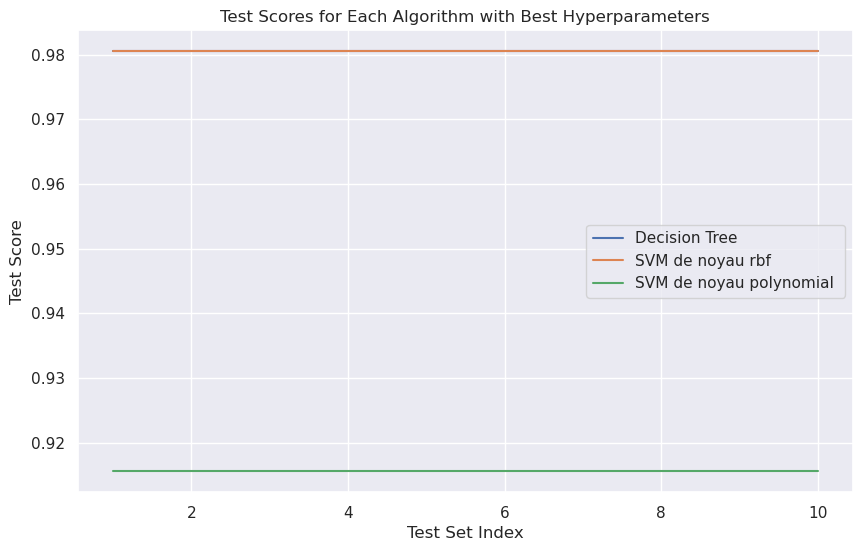

In [40]:
# à vous
best_models_df = pd.DataFrame({
    'Algorithm': ['Decision Tree', 'SVM de noyau rbf', 'SVM de noyau polynomial'],
    'Best Hyperparameters': [{'max_depth': 8}, {'C': 100, 'gamma':0.05}, {'C': 10000, 'degree':10}]
})

def get_test_score(algorithm_name, best_hyperparams):
    if algorithm_name == 'SVM de noyau rbf':
        model = SVC(kernel='rbf', **best_hyperparams)
    elif algorithm_name == 'Decision Tree':
        model = DecisionTreeClassifier(**best_hyperparams)
    elif algorithm_name == 'SVM de noyau polynomial':
        model = SVC(kernel='poly', **best_hyperparams)
    # Add more conditions for other algorithms if needed

    model.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
    y_pred = model.predict(X_test)  # Assuming X_test is your test data
    return accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 6))

for index, row in best_models_df.iterrows():
    algorithm_name = row['Algorithm']
    best_hyperparams = row['Best Hyperparameters']

    # Assuming 'get_test_score' is a function that returns the test score for a given algorithm and hyperparameters
    # Replace this with the actual function you're using to get test scores
    test_scores = [get_test_score(algorithm_name, best_hyperparams) for _ in range(10)]

    plt.plot(range(1, 11), test_scores, label=f"{algorithm_name} ")

plt.xlabel('Test Set Index')
plt.ylabel('Test Score')
plt.title('Test Scores for Each Algorithm with Best Hyperparameters')
plt.legend()
plt.show()

Pour chacune des méthodes, pour chaque meilleur hyperparamètre, calculer l'intervalle à 95% de confiance auquel le score doit appartenir en utilisant les résultats de la validation croisée. Si vous ne vous souvenez plus de comment on calcule un intervalle de confiance, vous pouvez consulter : https://fr.wikihow.com/calculer-un-intervalle-de-confiance


## Intervale de confiance de l'arbre de decision

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np


tree_model = DecisionTreeClassifier(max_depth=8, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10)  

# Calculate the mean and standard deviation of cross-validation scores
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Calculate the margin of error for a 95% confidence interval
margin_of_error = 1.96 * (std_dev / np.sqrt(len(cv_scores)))

# Calculate the confidence interval
confidence_interval = (mean_score - margin_of_error, mean_score + margin_of_error)

print("For the decision tree model:")
print(f"Mean Cross-Validation Score: {mean_score}")
print(f"95% Confidence Interval: {confidence_interval}")

For the decision tree model:
Mean Cross-Validation Score: 0.9707562136435749
95% Confidence Interval: (0.9609332757694172, 0.9805791515177326)


## Intervale de confiance de svm a noyau rbf

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np


rbf_model = SVC(kernel='rbf', C=100, gamma=0.05)

# Perform cross-validation
cv_scores = cross_val_score(rbf_model, X_train, y_train, cv=10)  

# Calculate the mean and standard deviation of cross-validation scores
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Calculate the margin of error for a 95% confidence interval
margin_of_error = 1.96 * (std_dev / np.sqrt(len(cv_scores)))

# Calculate the confidence interval
confidence_interval = (mean_score - margin_of_error, mean_score + margin_of_error)

print("For the decision tree model:")
print(f"Mean Cross-Validation Score: {mean_score}")
print(f"95% Confidence Interval: {confidence_interval}")

For the decision tree model:
Mean Cross-Validation Score: 0.960946589106293
95% Confidence Interval: (0.9517498184219285, 0.9701433597906576)


## Intervale de confiance de svm a noyau poly

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

poly_model = SVC(kernel='poly', C=10000, degree=10)

# Perform cross-validation
cv_scores = cross_val_score(poly_model, X_train, y_train, cv=10)  

# Calculate the mean and standard deviation of cross-validation scores
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

# Calculate the margin of error for a 95% confidence interval
margin_of_error = 1.96 * (std_dev / np.sqrt(len(cv_scores)))

# Calculate the confidence interval
confidence_interval = (mean_score - margin_of_error, mean_score + margin_of_error)

print("For the decision tree model:")
print(f"Mean Cross-Validation Score: {mean_score}")
print(f"95% Confidence Interval: {confidence_interval}")

For the decision tree model:
Mean Cross-Validation Score: 0.9218138551031201
95% Confidence Interval: (0.9011645601028537, 0.9424631501033864)


Quelle méthode est la meilleure pour prédire la classe de frais de chauffage ? De frais de climatisation ?

In [43]:
from sklearn.cluster import KMeans

# Assuming Yheat and Ycool are your target variables
Yheat_vector = Yheat.reshape(-1, 1)
Ycool_vector = Ycool.reshape(-1, 1)

# Define K-Means classifiers for Yheat and Ycool separately with 3 clusters
kmeans_heat = KMeans(n_clusters=3)
kmeans_cool = KMeans(n_clusters=3)

# Fit the models on the respective vectors
kmeans_heat.fit(Yheat_vector)
kmeans_cool.fit(Ycool_vector)

# Access the labels for each cluster
y_heat = kmeans_heat.labels_
y_cool = kmeans_cool.labels_

/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
X_heat_train, X_heat_test, y_heat_train, y_heat_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)
X_cool_train, X_cool_test, y_cool_train, y_cool_test = train_test_split(X, y_cool, test_size=0.2, random_state=42)

## Pour les données heat

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

results_dict = {
    "max_depth": [],
    "mean_train_score": [],
    "mean_cv_score": []
}
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    cv_score = cross_validate(clf, X_heat_train, y_heat_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
    results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))
                                                                                
    result_df = pd.DataFrame(results_dict)
result_df

,max_depth,mean_train_score,mean_cv_score
0,1,0.758958,0.758964
1,2,0.872964,0.872977
2,3,0.921824,0.921814
3,4,0.960912,0.960920
4,5,0.961455,0.952776
5,6,0.974846,0.956029
6,7,0.997105,0.988577
7,8,0.998372,0.990217
8,9,0.998733,0.990217
9,10,1.000000,0.990217


In [46]:
results = pd.melt(result_df, id_vars=['max_depth'], value_vars=['mean_train_score','mean_cv_score'])
import altair as alt
alt.Chart(results).mark_line().encode(
    x=alt.X('max_depth', title= 'Depth of tree'),
    y= alt.Y('value',title = 'Score', scale=alt.Scale(zero=False)),
    color=alt.Color('variable', title='Score type')
)

alt.Chart(...)

In [47]:
from sklearn.svm import SVC

results_dict = {
    "C": [],
    "gamma": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values =[1, 100, 10000]
gamma_values =  [0.01, 0.05, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        cv_score = cross_validate(clf, X_heat_train, y_heat_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["gamma"].append(gamma)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,gamma,mean_train_score,mean_cv_score
0,1,0.01,0.899022,0.898995
1,1,0.05,0.899022,0.898995
2,1,0.10,0.901014,0.898995
3,1,1.00,0.937206,0.905526
4,100,0.01,0.959825,0.944580
5,100,0.05,0.997286,0.985299
6,100,0.10,0.998009,0.986965
7,100,1.00,1.000000,0.957694
8,10000,0.01,0.997104,0.990217
9,10000,0.05,1.000000,0.986965


In [48]:
from sklearn.svm import SVC

results_dict = {
    "C": [],
    "degree": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values = [1, 100, 10000]
degree_values = [3, 6, 10]

for C in C_values:
    for degree in degree_values:
        clf = SVC(C=C, kernel='poly', degree = degree)
        cv_score = cross_validate(clf, X_heat_train, y_heat_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["degree"].append(degree)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,degree,mean_train_score,mean_cv_score
0,1,3,0.804560,0.804574
1,1,6,0.872964,0.872977
2,1,10,0.872964,0.872977
3,100,3,0.899022,0.898995
4,100,6,0.899022,0.898995
5,100,10,0.873688,0.869699
6,10000,3,0.905539,0.903887
7,10000,6,0.921104,0.915283
8,10000,10,0.926166,0.925066


In [49]:
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier(max_depth = 8, random_state = 42)
model1.fit(X_heat_train, y_heat_train)
y_pred1 = model1.predict(X_heat_test)
model1_score = accuracy_score(y_heat_test, y_pred1)

model2 = SVC(kernel='rbf', C=10000, gamma=0.01)
model2.fit(X_heat_train, y_heat_train)
y_pred2 = model2.predict(X_heat_test)
model2_score = accuracy_score(y_heat_test, y_pred2)

model3 = SVC(kernel='poly', C=10000, degree=10)
model3.fit(X_heat_train, y_heat_train)
y_pred3 = model3.predict(X_heat_test)
model3_score = accuracy_score(y_heat_test, y_pred3)

print("Pour arbre de décision:", model1_score)
print("Pour SVM a noyau rbf:", model2_score)
print("pour SVM a noyau poly:",model3_score)

Pour arbre de décision: 0.9805194805194806
Pour SVM a noyau rbf: 0.987012987012987
pour SVM a noyau poly: 0.8896103896103896


Le classifieur le plus meilleur pour prédire les frais de chauffage est le SVM à noyau rbf

## Pour les données climatisation

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

results_dict = {
    "max_depth": [],
    "mean_train_score": [],
    "mean_cv_score": []
}
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    cv_score = cross_validate(clf, X_cool_train, y_cool_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
    results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))
                                                                                
    result_df = pd.DataFrame(results_dict)
result_df

,max_depth,mean_train_score,mean_cv_score
0,1,0.825733,0.825727
1,2,0.907168,0.907351
2,3,0.931777,0.928318
3,4,0.940827,0.938207
4,5,0.950958,0.933316
5,6,0.958560,0.934849
6,7,0.963989,0.938102
7,8,0.971950,0.936489
8,9,0.984074,0.952803
9,10,0.989324,0.952750


In [59]:
results = pd.melt(result_df, id_vars=['max_depth'], value_vars=['mean_train_score','mean_cv_score'])
import altair as alt
alt.Chart(results).mark_line().encode(
    x=alt.X('max_depth', title= 'Depth of tree'),
    y= alt.Y('value',title = 'Score', scale=alt.Scale(zero=False)),
    color=alt.Color('variable', title='Score type')
)

alt.Chart(...)

profondeur = 12

In [60]:
from sklearn.svm import SVC

results_dict = {
    "C": [],
    "gamma": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values =[1, 100, 10000 ]
gamma_values =  [0.01, 0.05, 0.1, 1]

for C in C_values:
    for gamma in gamma_values:
        clf = SVC(C=C, kernel='rbf', gamma=gamma)
        cv_score = cross_validate(clf, X_cool_train, y_cool_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["gamma"].append(gamma)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,gamma,mean_train_score,mean_cv_score
0,1,0.01,0.907168,0.907351
1,1,0.05,0.912778,0.908990
2,1,0.10,0.914226,0.907324
3,1,1.00,0.944448,0.894289
4,100,0.01,0.940641,0.910497
5,100,0.05,0.975209,0.946325
6,100,0.10,0.988055,0.956055
7,100,1.00,1.000000,0.936674
8,10000,0.01,0.979371,0.947805
9,10000,0.05,1.000000,0.954416


In [61]:
results_dict = {
    "C": [],
    "degree": [],
    "mean_train_score": [],
    "mean_cv_score": []
}

C_values =[1, 100, 10000]
degree_values =  [3, 6, 10]

for C in C_values:
    for degree in degree_values:
        clf = SVC(C=C, kernel='poly', degree = degree)
        cv_score = cross_validate(clf, X_cool_train, y_cool_train, cv=10, return_train_score=True)
            
        results_dict["C"].append(C)
        results_dict["degree"].append(degree)
        results_dict["mean_cv_score"].append(np.mean(cv_score["test_score"]))
        results_dict["mean_train_score"].append(np.mean(cv_score["train_score"]))

result_df = pd.DataFrame(results_dict)
result_df

,C,degree,mean_train_score,mean_cv_score
0,1,3,0.845279,0.845426
1,1,6,0.845279,0.845426
2,1,10,0.907168,0.907351
3,100,3,0.851608,0.850344
4,100,6,0.901201,0.899154
5,100,10,0.907168,0.907351
6,10000,3,0.907168,0.907351
7,10000,6,0.918386,0.907351
8,10000,10,0.938474,0.934955


In [50]:
from sklearn.metrics import accuracy_score

model1 = DecisionTreeClassifier(max_depth = 13, random_state = 42)
model1.fit(X_cool_train, y_cool_train)
y_pred1 = model1.predict(X_cool_test)
model1_score = accuracy_score(y_cool_test, y_pred1)

model2 = SVC(kernel='rbf', C=10000, gamma=0.01)
model2.fit(X_cool_train, y_cool_train)
y_pred2 = model2.predict(X_cool_test)
model2_score = accuracy_score(y_cool_test, y_pred2)

model3 = SVC(kernel='poly', C=10000, degree=10)
model3.fit(X_cool_train, y_cool_train)
y_pred3 = model3.predict(X_cool_test)
model3_score = accuracy_score(y_cool_test, y_pred3)

print(f"Decision Tree: {model1_score}")
print(f"RBF SVM: {model2_score}")
print(f"Polynomial SVM: {model3_score}")

Decision Tree: 0.9415584415584416
RBF SVM: 0.9545454545454546
Polynomial SVM: 0.9155844155844156


Le classifieur le plus adéquat à séparer les classes de frais de climatisation est le SVM a noyau rbf

# Bonus : Travail à réaliser

Reproduisez pour les datasets suivants:
- [Iris](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
- [Digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) (en utilisant les données complètes)


les expérimentations suivantes:

- Mise au point de plusieurs types de classifieurs (Perceptron, régression logistique, SVM, Knn). Pour chacun de ces types de classifieurs vous devrez :
 - Définir les hyper-paramètres à faire varier.
 - Evaluer et selectionner par Grid-Search l'ensemble des configurations possibles, en utilisant la Validation Croisée à 3 plis pour l'évaluation de la performance en généralisation. Vous pourrez vous inspirer d'un code tel que [celui-ci](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) pour boucler sur les datasets et/ou les classifieurs.
- Ecrire sous forme d'un tableau récapitulatif les performances respectives (les meilleures obtenues) par chacun des modèles sur chacun des jeux de données (sur le test set).
- Donner des conclusions sur les résultats obtenus quant à la performance, la stabilité, la robustesse des familles de classifieurs utilisées, et les paramètres optimaux de chaque type de modèle.

In [51]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access features (X) and target variable (y)
X_iris = iris.data
y_iris = iris.target

In [52]:
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

# Access features (X_digits) and target variable (y_digits)
X_digits = digits.data
y_digits = digits.target

In [53]:
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

## Perceptron

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# Define the Perceptron model
perceptron = Perceptron()

# Define hyperparameters to tune
param_grid_perceptron = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'max_iter': [10, 50, 100, 200],
}

# Iris Dataset
grid_search_perceptron_iris = GridSearchCV(perceptron, param_grid_perceptron, cv=3, n_jobs = -1)
grid_search_perceptron_iris.fit(X_iris_train, y_iris_train)

# Print best hyperparameters
print("For Iris Dataset")
print("Best Hyperparameters for Perceptron on Iris Dataset:", grid_search_perceptron_iris.best_params_)

best_perceptron_model_iris = grid_search_perceptron_iris.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_perceptron_iris.best_score_
print("Cross-validated Score (Accuracy) of the Best Perceptron Model:", cv_score)


#For digis dataset
grid_search_perceptron_digits = GridSearchCV(perceptron, param_grid_perceptron, cv=3, n_jobs = -1)
grid_search_perceptron_digits.fit(X_digits_train, y_digits_train)

# Print best hyperparameters
print("For Digits Dataset")
print("Best Hyperparameters for Perceptron on Digits Dataset:", grid_search_perceptron_digits.best_params_)

best_perceptron_model_digits = grid_search_perceptron_digits.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_perceptron_digits.best_score_
print("Cross-validated Score (Accuracy) of the Best Perceptron Model:", cv_score)

/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3

For Iris Dataset
Best Hyperparameters for Perceptron on Iris Dataset: {'alpha': 0.001, 'max_iter': 10}
Cross-validated Score (Accuracy) of the Best Perceptron Model: 0.875
For Digits Dataset
Best Hyperparameters for Perceptron on Digits Dataset: {'alpha': 0.001, 'max_iter': 50}
Cross-validated Score (Accuracy) of the Best Perceptron Model: 0.9269311064718163


/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression()

# Define hyperparameters to tune
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'liblinear']
}

# Iris dataset
grid_search_logreg_iris = GridSearchCV(logreg, param_grid_logreg, cv=3, n_jobs = -1)
grid_search_logreg_iris.fit(X_iris_train, y_iris_train)

# Print best hyperparameters
print("For Iris Dataset")
print("Best Hyperparameters for Logistic Regression on Iris Dataset:", grid_search_logreg_iris.best_params_)

best_logreg_model_iris = grid_search_logreg_iris.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_logreg_iris.best_score_
print("Cross-validated Score (Accuracy) of the Best Logistic Regression Model:", cv_score)


# Digits dataset
grid_search_logreg_digits = GridSearchCV(logreg, param_grid_logreg, cv=3, n_jobs = -1)
grid_search_logreg_digits.fit(X_digits_train, y_digits_train)

# Print best hyperparameters
print("For Digits Dataset")
print("Best Hyperparameters for Logistic Regression on Digits Dataset:", grid_search_logreg_digits.best_params_)

best_logreg_model_digits = grid_search_logreg_digits.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_logreg_digits.best_score_
print("Cross-validated Score (Accuracy) of the Best Logistic Regression Model:", cv_score)

/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fi

For Iris Dataset
Best Hyperparameters for Logistic Regression on Iris Dataset: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Cross-validated Score (Accuracy) of the Best Logistic Regression Model: 0.9666666666666667
For Digits Dataset
Best Hyperparameters for Logistic Regression on Digits Dataset: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validated Score (Accuracy) of the Best Logistic Regression Model: 0.9603340292275574


/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/omar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line

## SVM

In [56]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

# Iris dataset
grid_search_svm_iris = GridSearchCV(svm_model, param_grid_svm, cv=3)
grid_search_svm_iris.fit(X_iris_train, y_iris_train)

# Print best hyperparameters
print("For Iris Dataset")
print("Best Hyperparameters for SVM on Iris Dataset:", grid_search_svm_iris.best_params_)

best_svm_model_iris = grid_search_svm_iris.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_svm_iris.best_score_
print("Cross-validated Score (Accuracy) of the Best SVM Model:", cv_score)


# Digits dataset
grid_search_svm_digits = GridSearchCV(svm_model, param_grid_svm, cv=3, n_jobs = -1)
grid_search_svm_digits.fit(X_digits_train, y_digits_train)

# Print best hyperparameters
print("For Digits Dataset")
print("Best Hyperparameters for SVM on Digits Dataset:", grid_search_svm_digits.best_params_)

best_svm_model_digits = grid_search_svm_digits.best_estimator_

# Calculate and print the cross-validated score (accuracy)
cv_score = grid_search_svm_digits.best_score_
print("Cross-validated Score (Accuracy) of the Best SVM Model:", cv_score)

For Iris Dataset
Best Hyperparameters for SVM on Iris Dataset: {'C': 1, 'kernel': 'linear'}
Cross-validated Score (Accuracy) of the Best SVM Model: 0.975
For Digits Dataset
Best Hyperparameters for SVM on Digits Dataset: {'C': 10, 'kernel': 'rbf'}
Cross-validated Score (Accuracy) of the Best SVM Model: 0.9881697981906751


In [57]:
y_pred_perceptron_iris =best_perceptron_model_iris.predict(X_iris_test)
perceptron_iris_accuracy = accuracy_score(y_iris_test, y_pred_perceptron_iris)
print("Accuracy on Iris Test Set with perceptron:", perceptron_iris_accuracy)

y_pred_perceptron_digits =best_perceptron_model_digits.predict(X_digits_test)
perceptron_digits_accuracy = accuracy_score(y_digits_test, y_pred_perceptron_digits)
print("Accuracy on Digits Test Set with perceptron:", perceptron_digits_accuracy)

y_pred_svm_iris =best_svm_model_iris.predict(X_iris_test)
svm_iris_accuracy = accuracy_score(y_iris_test, y_pred_svm_iris)
print("Accuracy on Iris Test Set with SVM:", svm_iris_accuracy)

y_pred_svm_digits =best_svm_model_digits.predict(X_digits_test)
svm_digits_accuracy = accuracy_score(y_digits_test, y_pred_svm_digits)
print("Accuracy on Digits Test Set with SVM:", svm_digits_accuracy)

y_pred_logreg_iris =best_logreg_model_iris.predict(X_iris_test)
logreg_iris_accuracy = accuracy_score(y_iris_test, y_pred_logreg_iris)
print("Accuracy on Iris Test Set with Logistic Regression:", logreg_iris_accuracy)

y_pred_logreg_digits =best_logreg_model_digits.predict(X_digits_test)
logreg_digits_accuracy = accuracy_score(y_digits_test, y_pred_logreg_digits)
print("Accuracy on Digits Test Set with Logistic Regression:", logreg_digits_accuracy)

Accuracy on Iris Test Set with perceptron: 0.8
Accuracy on Digits Test Set with perceptron: 0.9527777777777777
Accuracy on Iris Test Set with SVM: 1.0
Accuracy on Digits Test Set with SVM: 0.9861111111111112
Accuracy on Iris Test Set with Logistic Regression: 1.0
Accuracy on Digits Test Set with Logistic Regression: 0.9611111111111111


| Model                 |Iris Dataset Test Score |Digits Dataset  Test Score  |
|-----------------------|----------------------|----------------------|
| Perceptron            | 0.8                  | 0.9528               |
| SVM                   | 1.0                  | 0.9861               |
| Logistic Regression   | 1.0                  | 0.9611               |
| Perceptron Optimal Hyperparameters| alpha=0.001, max_iter=10 | alpha=0.001, max_iter=50 |
| SVM Optimal Hyperparameters | C=1, krnel='linear' | C=10, kernel='rbf' |
| Logistic Regression Optimal Hyperparameters| C=1, penalty='l2', solver='newton-cg' | C=0.1, penalty='l1', solver='liblinear' |

## Conclusion

SVM has the highest accuracy and generlisation power, followed by the logistic regression, and lastly the perceptron.

In terms of performance,
SVM achieved perfect accuracy on the Iris dataset, and has the highest (almost perfect) accuracy on digits test set, making it the most performant model.

Logistic Regression also achieved perfect accuracy on the Iris dataset, and has very high accuracy on digits test set making also very performing model.

Perceptron has a very high accuracy on the digits set, but has a relatively meduim accuracy on the iris dataset, especially compared to the other models, making it moderately performant.

In terms of robustness (generalisation), SVM is very robust having highest accuracy on the unseen test sets, the same can be said on the logistic regression, however the perceptron failed to generalise on the iris dataset.

In terms of of hyperparameters, perceptron acheived good accuracy in both cases with low alpha and low iterations numbers. However, for both svm and logistic regression, the hyperparameters completely changed in order to adequately adapt to each dataset, making them robust and stable across each dataset.

We easily notice that C and the kernel changed in svm, on the other hand, the penalty, solver and C changed for the logistic regression models.